# Introduction

This notebook simulates the top mass reweighting by using Gaussian with mean 172.5 and 175 with with large variance

## Imports

In [1]:
# standard library imports
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense, Input, Layer, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.backend import concatenate

# standard numerical library imports
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

/home/csuaysom/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/csuaysom/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/csuaysom/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/csuaysom/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.

In [2]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22) 
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('legend', fontsize=15)

# Scanning value for reweighting from $\mathcal{N}(172.5, \sigma)$ to $\mathcal{N}(175, \sigma)$

## Build datasets

In [18]:
def reweight(sigma):
    n_data_points = 10**5
    mu0 = 172.5
    mu1 = 175
    var0 = sigma
    var1 = sigma

    X0 = np.random.normal(mu0, var0, n_data_points)
    X1 = np.random.normal(mu1, var1, n_data_points)
    
    bins = np.linspace(130,200,50)
    plt.hist(X0, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X1, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.title("Data for reweighting with $\sigma= $ "+ str(sigma))
    plt.show()

    Y0 = to_categorical(np.zeros(n_data_points), num_classes=2)
    Y1 = to_categorical(np.ones(n_data_points), num_classes=2)

    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    inputs = Input((1,))
    hidden_layer_1 = Dense(20, activation='relu')(inputs)
    hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(20, activation='relu')(hidden_layer_2)

    outputs = Dense(2, activation='softmax')(hidden_layer_3)

    model = Model(inputs = inputs, outputs = outputs)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', )
    
    earlystopping = EarlyStopping(patience = 50,)

    history = model.fit(X_train, Y_train, 
              epochs=50, 
              batch_size = 100,
              validation_data = (X_test, Y_test),
              callbacks = [earlystopping])
    plt.plot(history.history['loss'],     label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val loss')
    plt.legend(loc=0)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.show()
    
    X0_val = np.random.normal(mu0, var0, n_data_points)
    X1_val = np.random.normal(mu1, var1, n_data_points)
    
    preds = model.predict(X0_val)
    weights = preds[:,1]/preds[:,0]
    
    bins = np.linspace(0.5,1.5,50)
    plt.hist(weights, bins = bins, alpha = 0.5)[0]
    plt.title("Distribution of weight")
    plt.show()
    
    bins = np.linspace(130,200,50)
    plt.hist(X0_val, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X0_val, bins = bins, label = r'$172.5$ weighted', weights=weights, histtype='step', color='k')
    plt.hist(X1_val, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.show()

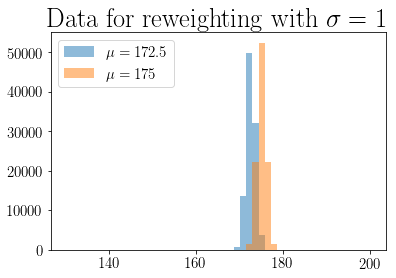

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 13s 79us/step - loss: 0.7228 - val_loss: 0.6919
Epoch 2/50
160000/160000 [==============================] - 10s 63us/step - loss: 0.7072 - val_loss: 0.6907
Epoch 3/50
160000/160000 [==============================] - 10s 62us/step - loss: 0.7038 - val_loss: 0.7119
Epoch 4/50
160000/160000 [==============================] - 10s 62us/step - loss: 0.7000 - val_loss: 0.6914
Epoch 5/50
160000/160000 [==============================] - 10s 62us/step - loss: 0.6941 - val_loss: 0.6890
Epoch 6/50
160000/160000 [==============================] - 10s 63us/step - loss: 0.6915 - val_loss: 0.6981
Epoch 7/50
160000/160000 [==============================] - 10s 62us/step - loss: 0.6883 - val_loss: 0.6857
Epoch 8/50
160000/160000 [==============================] - 10s 62us/step - loss: 0.6864 - val_loss: 0.6832
Epoch 9/50
160000/160000 [==============================] - 10s 63us/step - loss: 0.6

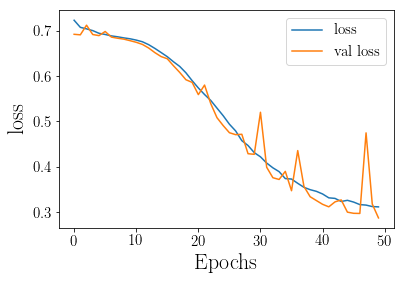

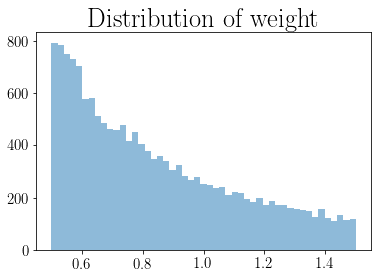

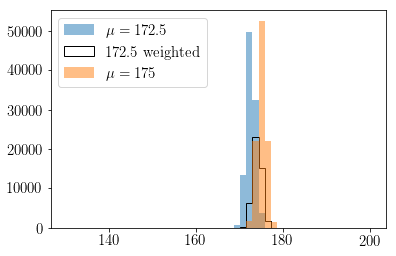

In [19]:
reweight(1)

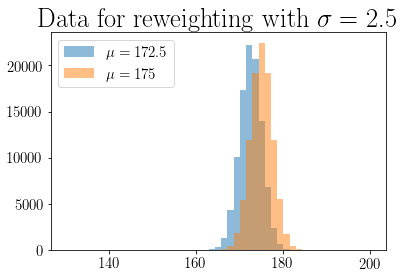

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 14s 87us/step - loss: 0.7046 - val_loss: 0.6934
Epoch 2/50
160000/160000 [==============================] - 11s 66us/step - loss: 0.7024 - val_loss: 0.6938
Epoch 3/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6968 - val_loss: 0.6897
Epoch 4/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6930 - val_loss: 0.6888
Epoch 5/50
160000/160000 [==============================] - 11s 66us/step - loss: 0.6901 - val_loss: 0.6885
Epoch 6/50
160000/160000 [==============================] - 10s 64us/step - loss: 0.6891 - val_loss: 0.6873
Epoch 7/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6875 - val_loss: 0.6893
Epoch 8/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6863 - val_loss: 0.6887
Epoch 9/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6

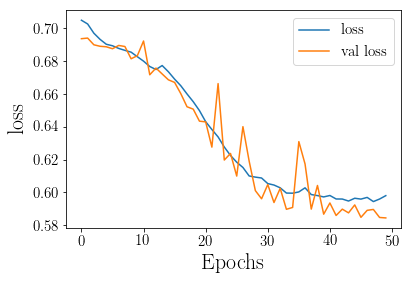

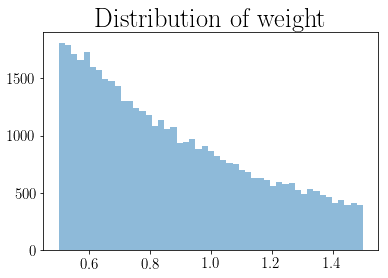

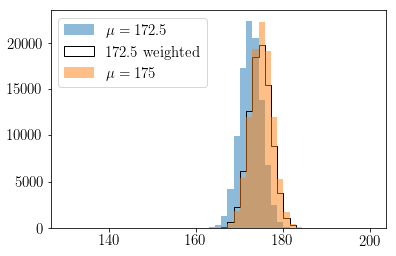

In [31]:
reweight(2.5)

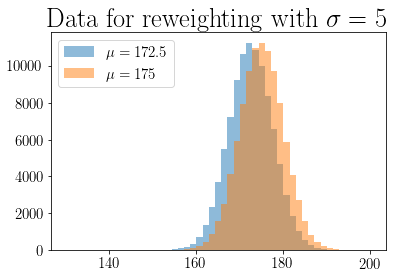

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 14s 88us/step - loss: 0.7139 - val_loss: 0.7155
Epoch 2/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.7005 - val_loss: 0.6909
Epoch 3/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6953 - val_loss: 0.6899
Epoch 4/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6921 - val_loss: 0.6895
Epoch 5/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6907 - val_loss: 0.6928
Epoch 6/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6903 - val_loss: 0.6895
Epoch 7/50
160000/160000 [==============================] - 10s 66us/step - loss: 0.6888 - val_loss: 0.6868
Epoch 8/50
160000/160000 [==============================] - 10s 66us/step - loss: 0.6884 - val_loss: 0.6908
Epoch 9/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6

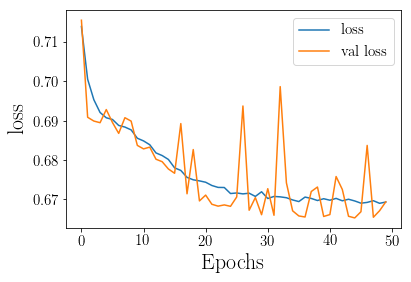

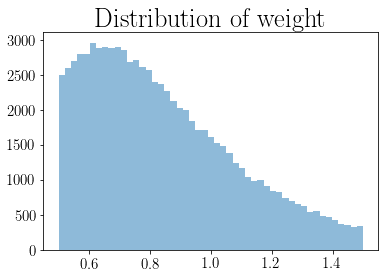

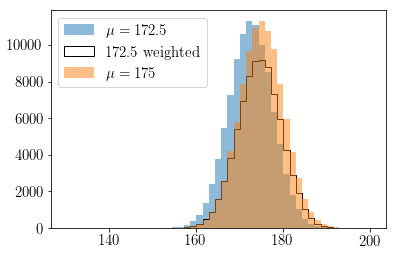

In [32]:
reweight(5)

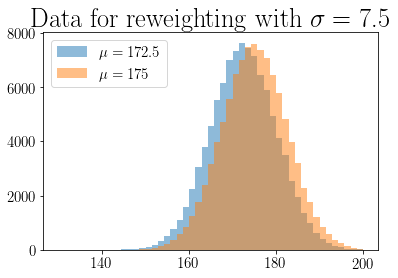

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 94us/step - loss: 0.7158 - val_loss: 0.7138
Epoch 2/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6986 - val_loss: 0.6929
Epoch 3/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6927 - val_loss: 0.6898
Epoch 4/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6902 - val_loss: 0.7055
Epoch 5/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6901 - val_loss: 0.6905
Epoch 6/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6896 - val_loss: 0.6905
Epoch 7/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6892 - val_loss: 0.6864
Epoch 8/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6882 - val_loss: 0.6889
Epoch 9/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6

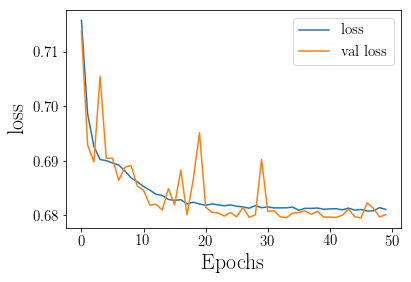

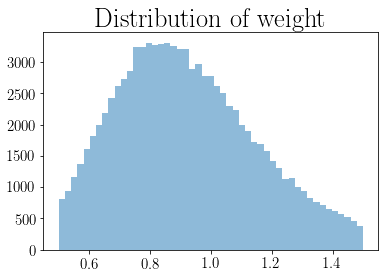

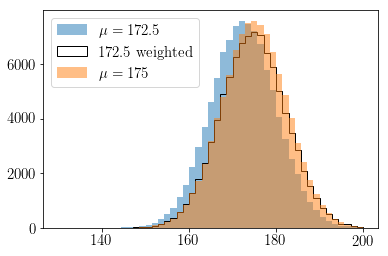

In [41]:
reweight(7.5)

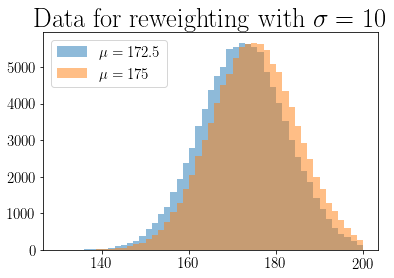

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 91us/step - loss: 0.7150 - val_loss: 0.6966
Epoch 2/50
160000/160000 [==============================] - 11s 66us/step - loss: 0.6957 - val_loss: 0.6918
Epoch 3/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6930 - val_loss: 0.6923
Epoch 4/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6912 - val_loss: 0.6895
Epoch 5/50
160000/160000 [==============================] - 11s 66us/step - loss: 0.6908 - val_loss: 0.6887
Epoch 6/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6906 - val_loss: 0.6920
Epoch 7/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6903 - val_loss: 0.6880
Epoch 8/50
160000/160000 [==============================] - 11s 66us/step - loss: 0.6904 - val_loss: 0.6889
Epoch 9/50
160000/160000 [==============================] - 10s 65us/step - loss: 0.6

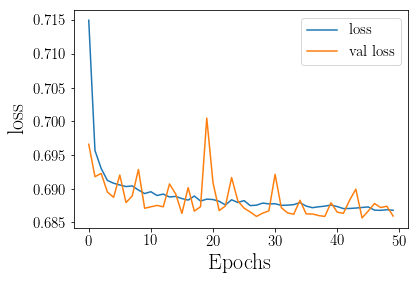

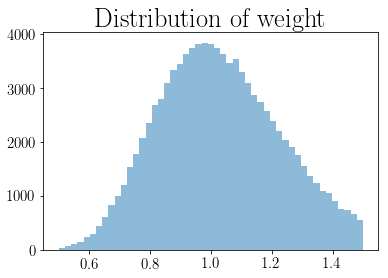

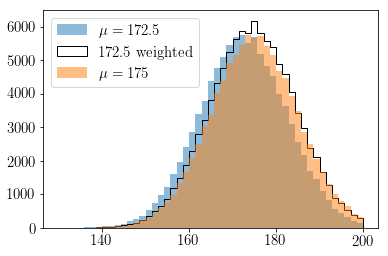

In [38]:
reweight(10)

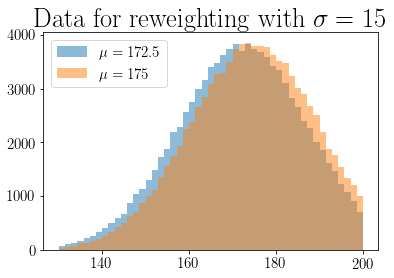

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 95us/step - loss: 0.7150 - val_loss: 0.6920
Epoch 2/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6990 - val_loss: 0.6914
Epoch 3/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6973 - val_loss: 0.6908
Epoch 4/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6953 - val_loss: 0.7003
Epoch 5/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6939 - val_loss: 0.6947
Epoch 6/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6927 - val_loss: 0.6949
Epoch 7/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6919 - val_loss: 0.6915
Epoch 8/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6917 - val_loss: 0.6923
Epoch 9/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6

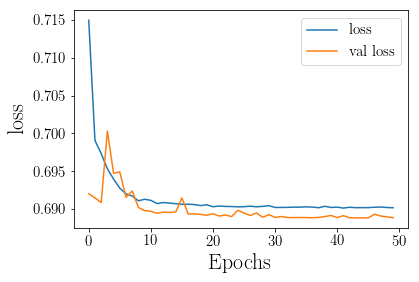

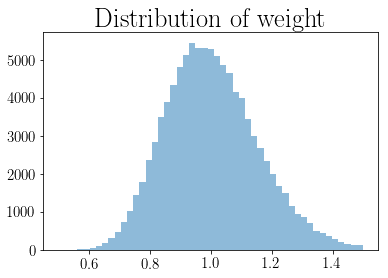

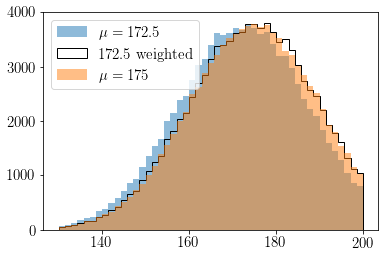

In [39]:
reweight(15)

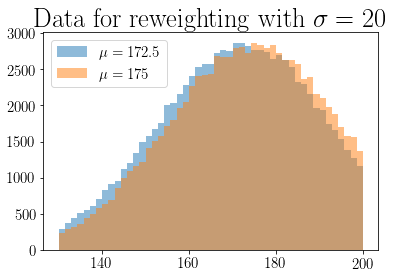

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 94us/step - loss: 0.7008 - val_loss: 0.6917
Epoch 2/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6959 - val_loss: 0.6934
Epoch 3/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6947 - val_loss: 0.6937
Epoch 4/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6934 - val_loss: 0.6909
Epoch 5/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6926 - val_loss: 0.6931
Epoch 6/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6925 - val_loss: 0.6926
Epoch 7/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6921 - val_loss: 0.6910
Epoch 8/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6921 - val_loss: 0.6918
Epoch 9/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6

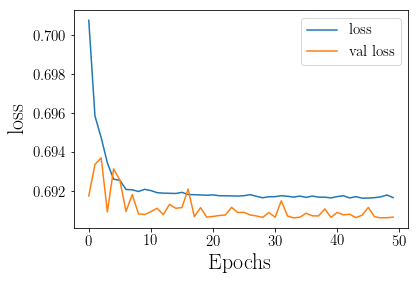

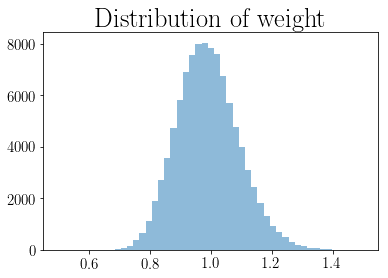

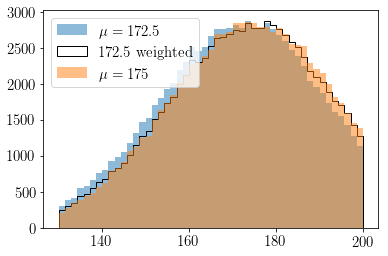

In [42]:
reweight(20)

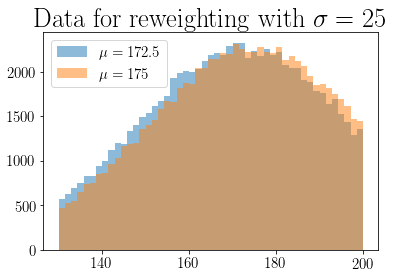

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 96us/step - loss: 0.7339 - val_loss: 0.6929
Epoch 2/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7284 - val_loss: 0.7108
Epoch 3/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7208 - val_loss: 0.6918
Epoch 4/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7151 - val_loss: 0.7084
Epoch 5/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7122 - val_loss: 0.8163
Epoch 6/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7102 - val_loss: 0.6920
Epoch 7/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.7074 - val_loss: 0.6935
Epoch 8/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7066 - val_loss: 0.6926
Epoch 9/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.7

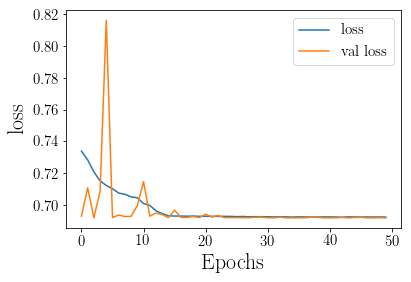

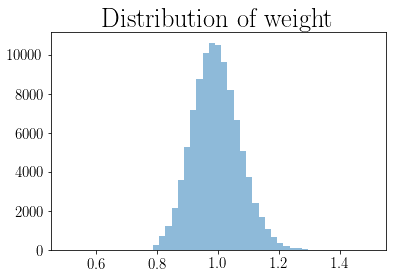

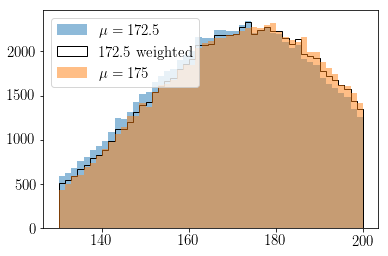

In [43]:
reweight(25)

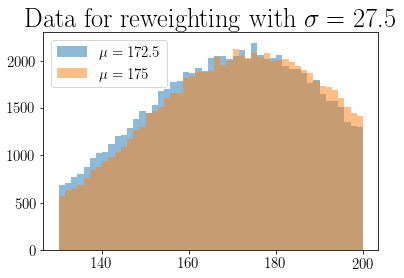

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 17s 109us/step - loss: 0.7343 - val_loss: 0.7211
Epoch 2/50
160000/160000 [==============================] - 12s 78us/step - loss: 0.7043 - val_loss: 0.6960
Epoch 3/50
160000/160000 [==============================] - 12s 77us/step - loss: 0.7019 - val_loss: 0.7295
Epoch 4/50
160000/160000 [==============================] - 12s 78us/step - loss: 0.6994 - val_loss: 0.6928
Epoch 5/50
160000/160000 [==============================] - 12s 77us/step - loss: 0.6964 - val_loss: 0.6994
Epoch 6/50
160000/160000 [==============================] - 12s 76us/step - loss: 0.6952 - val_loss: 0.6964
Epoch 7/50
160000/160000 [==============================] - 12s 77us/step - loss: 0.6935 - val_loss: 0.6927
Epoch 8/50
160000/160000 [==============================] - 12s 77us/step - loss: 0.6930 - val_loss: 0.6925
Epoch 9/50
160000/160000 [==============================] - 12s 77us/step - loss: 0.

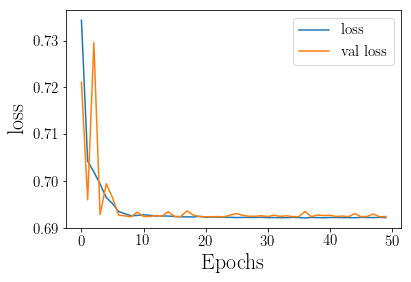

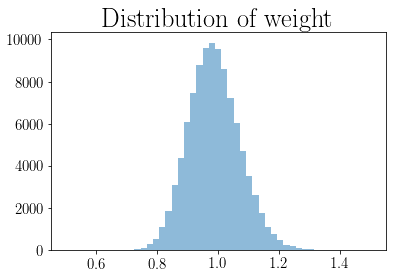

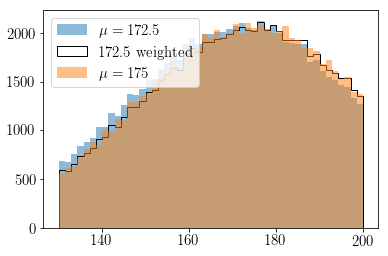

In [45]:
reweight(27.5)

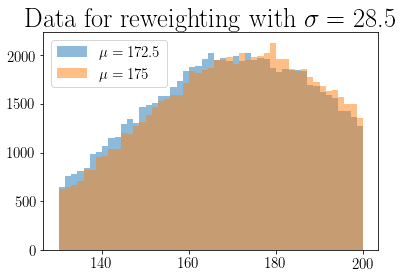

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 16s 100us/step - loss: 0.7649 - val_loss: 0.7021
Epoch 2/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6964 - val_loss: 0.6927
Epoch 3/50
160000/160000 [==============================] - 11s 70us/step - loss: 0.6942 - val_loss: 0.6933
Epoch 4/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.6933 - val_loss: 0.6940
Epoch 5/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6929 - val_loss: 0.6932
Epoch 6/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6930 - val_loss: 0.6924
Epoch 7/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6929 - val_loss: 0.6924
Epoch 8/50
160000/160000 [==============================] - 11s 70us/step - loss: 0.6930 - val_loss: 0.6925
Epoch 9/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.

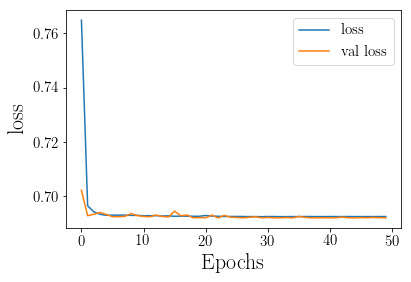

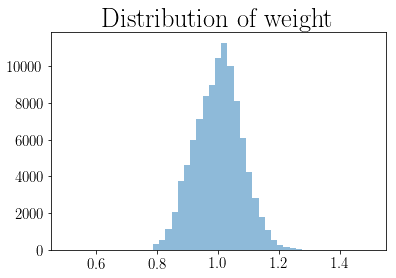

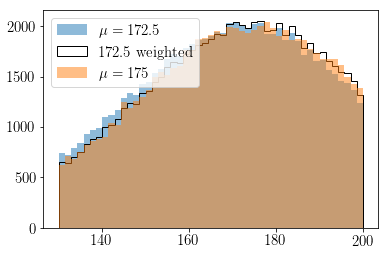

In [46]:
reweight(28.5)

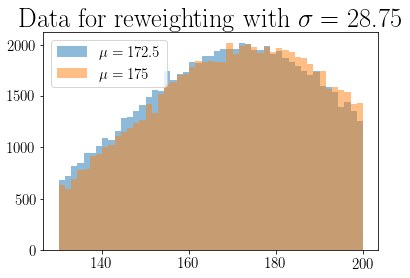

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 16s 99us/step - loss: 0.7406 - val_loss: 0.7075
Epoch 2/50
160000/160000 [==============================] - 11s 69us/step - loss: 0.7056 - val_loss: 0.7073
Epoch 3/50
160000/160000 [==============================] - 11s 69us/step - loss: 0.7014 - val_loss: 0.6942
Epoch 4/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.7004 - val_loss: 0.6921
Epoch 5/50
160000/160000 [==============================] - 11s 69us/step - loss: 0.6981 - val_loss: 0.6957
Epoch 6/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6971 - val_loss: 0.6922
Epoch 7/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6957 - val_loss: 0.6921
Epoch 8/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6937 - val_loss: 0.6930
Epoch 9/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6

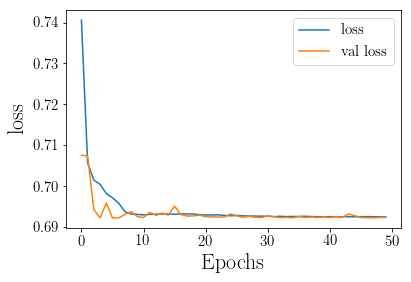

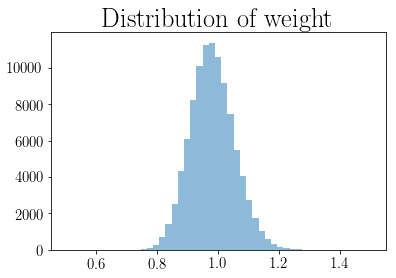

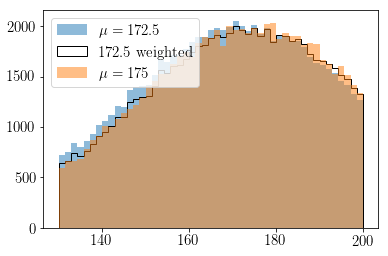

In [49]:
reweight(28.75)

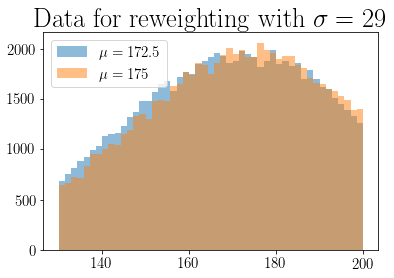

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 17s 103us/step - loss: 1.0781 - val_loss: 0.6940
Epoch 2/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6983 - val_loss: 0.7081
Epoch 3/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6962 - val_loss: 0.6947
Epoch 4/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.6940 - val_loss: 0.6927
Epoch 5/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6933 - val_loss: 0.6946
Epoch 6/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6933 - val_loss: 0.6933
Epoch 7/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/50
160000/160000 [==============================] - 12s 73us/step - loss: 0.

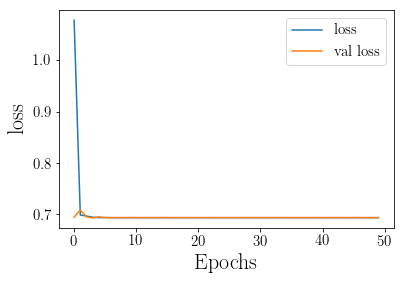

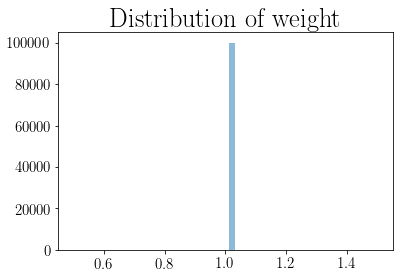

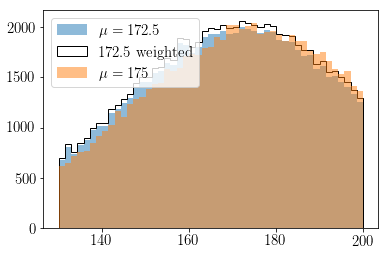

In [48]:
reweight(29)

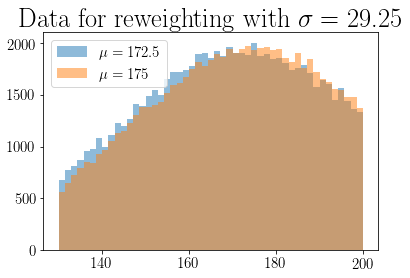

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 16s 101us/step - loss: 0.8068 - val_loss: 0.6992
Epoch 2/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.7002 - val_loss: 0.6926
Epoch 3/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.6973 - val_loss: 0.6924
Epoch 4/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6966 - val_loss: 0.7044
Epoch 5/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.6949 - val_loss: 0.6930
Epoch 6/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6931 - val_loss: 0.6939
Epoch 7/50
160000/160000 [==============================] - 11s 71us/step - loss: 0.6929 - val_loss: 0.6925
Epoch 8/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.6930 - val_loss: 0.6930
Epoch 9/50
160000/160000 [==============================] - 11s 72us/step - loss: 0.

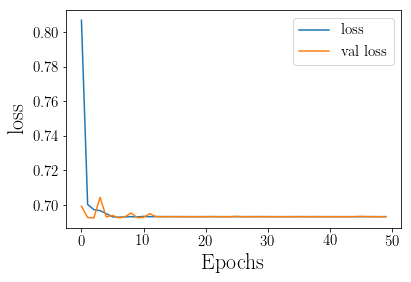

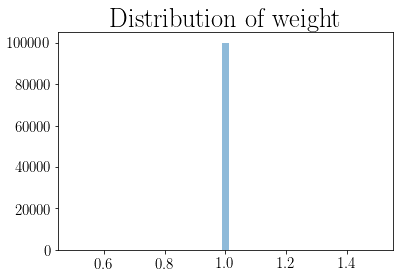

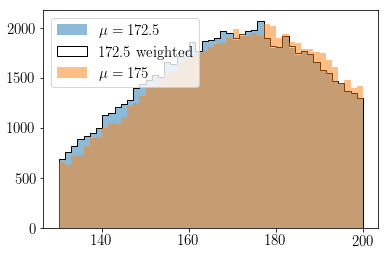

In [47]:
reweight(29.25)

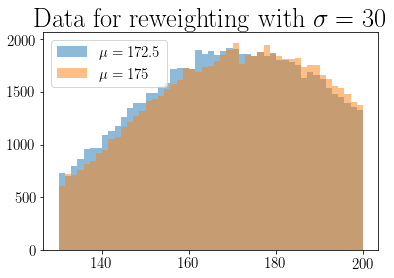

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 15s 96us/step - loss: 0.7129 - val_loss: 0.6948
Epoch 2/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6992 - val_loss: 0.7064
Epoch 3/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6955 - val_loss: 0.6924
Epoch 4/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6930 - val_loss: 0.6941
Epoch 5/50
160000/160000 [==============================] - 11s 67us/step - loss: 0.6931 - val_loss: 0.6928
Epoch 6/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6932 - val_loss: 0.6926
Epoch 7/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6933 - val_loss: 0.6932
Epoch 8/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/50
160000/160000 [==============================] - 11s 68us/step - loss: 0.6

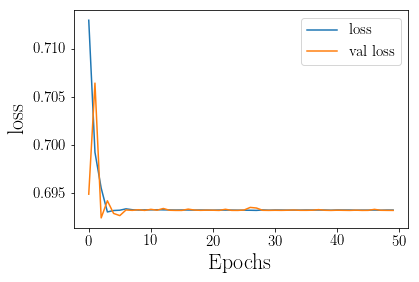

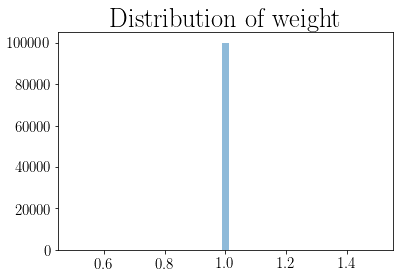

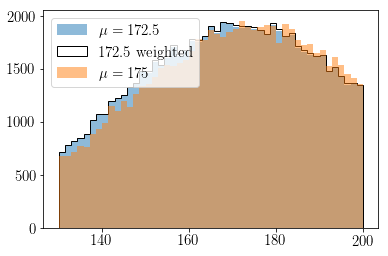

In [44]:
reweight(30)